In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
# read in the JSOn files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Now it is time to clean the data in the <code>profile</code> dataframe, lets begin with the <code>became_member_on</code> column that has the information of when the client created an app account and has a format of timestamp, so I'm going to transform it, because it will be more useful in a datetime format.

In [5]:
profile.loc[:,'became_member_on'] = pd.to_datetime(profile.became_member_on, format= '%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [6]:
# Separating the day, month and year into different columns
profile.loc[:,'member_day'] = profile.became_member_on.apply(lambda x: x.day)
profile.loc[:,'member_month'] = profile.became_member_on.apply(lambda x: x.month)
profile.loc[:,'member_year'] = profile.became_member_on.apply(lambda x: x.year)
profile.head()

,gender,age,id,became_member_on,income,member_day,member_month,member_year
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,12,2,2017
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,15,7,2017
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,12,7,2018
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,9,5,2017
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,4,8,2017


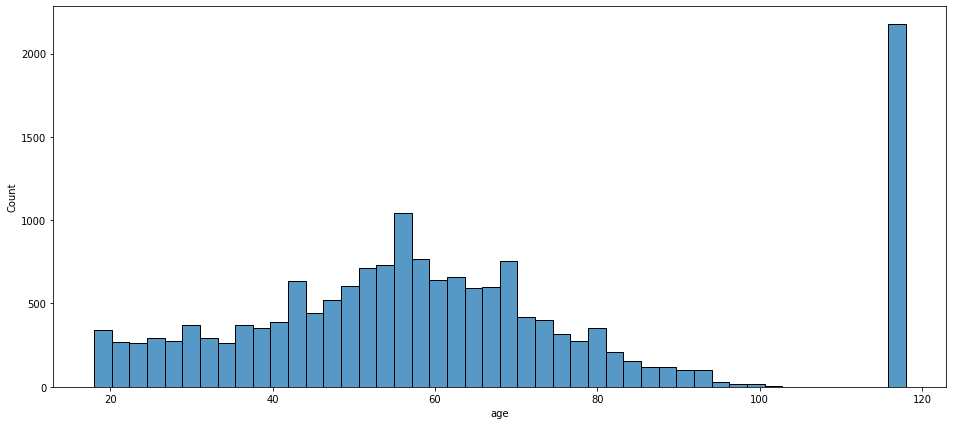

In [7]:
plt.figure(figsize=(16,7))
sns.histplot(data = profile, x = 'age')
plt.show()

From the histogram plotted above we can see that it has the shape of a normal distribution, but also notice that at the right of the plot it has more than 2000 values for an age of 118 years old which doesn't seem very common. So it is a good idea to explore more deeply this dataframe

In [8]:
# Exploring the data where the age is different to 118
print('There are',str(profile.loc[profile['age'] != 118,'age'].value_counts().sum()), 'rows with an age value different from 118')
profile.loc[profile['age'] != 118,:].isnull().sum()

There are 14825 rows with an age value different from 118


gender              0
age                 0
id                  0
became_member_on    0
income              0
member_day          0
member_month        0
member_year         0
dtype: int64

The dataset where the age is different from 118 doesn't have null values. Now let's take a look at the dataframe where the age is 118

In [9]:
# Now Exploring the data where the age is 118 
print('There are',str(profile.loc[profile['age'] == 118,'age'].value_counts().tolist()[0]), 'rows with an age value of 118')
profile.loc[profile['age'] == 118,:].isnull().sum()

There are 2175 rows with an age value of 118


gender              2175
age                    0
id                     0
became_member_on       0
income              2175
member_day             0
member_month           0
member_year            0
dtype: int64

From above we can note that all the 2175 rows in wich age has a value of 118, also have null values at gender and income columns, this represents the 12.8% of the 17000 rows, and due to the lack of features where I can predict the gender, age and income (the only featore left is the date where the customer became a member) for these customers I decided to drop this rows and continue with the rest of the dataset for further analisys.

In [10]:
# Dropping the rows with null values which are the seame with an age of 118 years old
profile.dropna(axis = 0, inplace = True)
print('There are', profile.shape[0],'rows left after dropping the null values')

There are 14825 rows left after dropping the null values


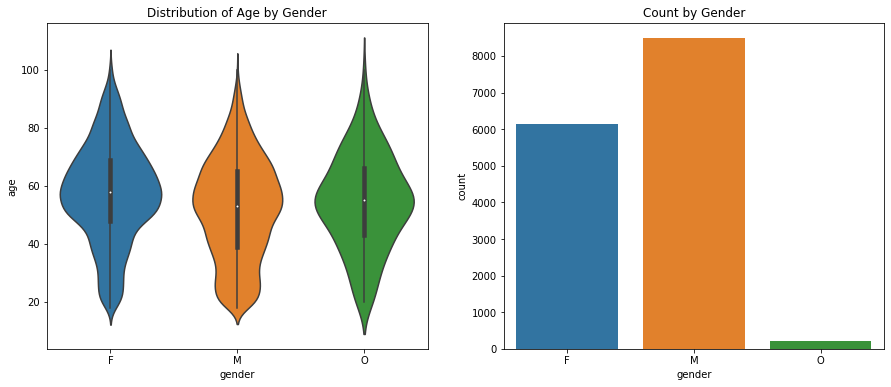

In [11]:
# Analyzing the distribution of ages by gender
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6))
sns.violinplot(ax = ax1, data = profile, x = 'gender',y= 'age')
ax1.set_title('Distribution of Age by Gender')
sns.countplot(ax = ax2, data = profile, x = 'gender')
ax2.set_title('Count by Gender')
plt.show()

The violin plot (that is not scaled by the number of observations of each category) shows that all gender categories have a normal distribution of the data. From the count plot is clear that most observations at gender feature are male, and it is important to note that the number of observations for <code>other</code> genders are a lot less than for <code>Male</code> and <code>Female</code>

In [12]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [13]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [14]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [15]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [16]:
# Getting the unique values of events in the transcript DF
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

As we can see, the events can be divided in two groups, on the one hand we have different states of the offer, and on the other hand we have the transaction information, considering this I'm going to create a DataFrame for each of the mencioned groups

In [17]:
# DataFrame containing the transaction information
transaction_df = transcript[transcript.event == 'transaction']
transaction_df.head()

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


In [18]:
# Dataframe containing the different states of the offer
offer_events_df = transcript[transcript.event != 'transaction']
offer_events_df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [19]:
offer_events_df.loc[:,'Value_keys'] = offer_events_df.value.apply(lambda x: list(x.keys())[0])

In [20]:
offer_events_df['Value_keys'].unique()

array(['offer id', 'offer_id'], dtype=object)

Extracting the values of the value column dictionaries considering the two unique keys <code>'offer id'</code> and <code>'offer_id'</code> for the <code>offer_events_df</code>, and the <code>'amount'</code> key for the <code>transaction_df</code>; and putting them in a new column

In [21]:
offer_events_df.loc[:,'offer_id'] = offer_events_df.value.apply(lambda x: x.get('offer id') if x.get('offer id') is not None else x.get('offer_id'))

In [22]:
transaction_df.loc[:,'amount'] = transaction_df.value.apply(lambda x: x.get('amount'))

In [23]:
# Dropping the columns that I don't need anymore 
offer_events_df.drop(['value','Value_keys'], axis = 1, inplace = True)
transaction_df.drop(['value'], axis = 1, inplace = True) 

In [24]:
offer_events_df.head()

,person,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [25]:
transaction_df.head()

,person,event,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97


In [26]:
portfolio.channels.astype(str).unique()

array(["['email', 'mobile', 'social']",
       "['web', 'email', 'mobile', 'social']",
       "['web', 'email', 'mobile']", "['web', 'email']"], dtype=object)

There are 4 channels in the portfolio dataframe: email, mobile, social, web, so I'm going to create one column for each on them and indicate with a 1 if the offer was present on that channel and a 0 if it wasn't.

In [27]:
channels = ['email','mobile','social','web']
for channel in channels:
    portfolio[channel] = portfolio.channels.apply(lambda x: int(1) if channel in x else int(0))

# Dropping the channels column
portfolio.drop(['channels'], axis = 1, inplace = True)

In [28]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [29]:
# Getting the unique values in the offer_type column
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

Since there are three categorical variables <code>bogo</code>, <code>informational</code> and <code>discount</code>, I'm going to perform a One-Hot Encoding using dummy variables, and to reduce the Multi-colinearity I will drop the first variable, because I only need two dummy variables to have the complete offer type information, if the <code>discount</code> and <code>informational</code> have a value of 0 indicates that the offer type is <code>bogo</code>

In [30]:
offer_type_dummies = pd.get_dummies(portfolio.offer_type, drop_first = True)
portfolio = pd.concat([portfolio,offer_type_dummies], axis = 1)
portfolio.head(30)

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,discount,informational
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,0,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,0,0
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,0,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,1,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,1,0
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,1,0
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,0,0
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,1,0


In [32]:
offer_events_df.head()

,person,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [33]:
# Making a pivot table to have the time of each offer event by each offer id and person id
pivot_offer_df = pd.pivot_table(data=offer_events_df, 
                            index=['person','offer_id'], 
                            columns=['event'], 
                            values='time').reset_index()
pivot_offer_df = pivot_offer_df[['person', 'offer_id', 'offer received', 'offer viewed', 'offer completed']]
pivot_offer_df.head()

event,person,offer_id,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,372.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,192.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528.0


In [34]:
transaction_df.head()

,person,event,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97
